In [1]:
import keras
from keras import layers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784,activation='sigmoid')(encoded)

## Map input to reconstructed img
autoencoder = keras.Model(input_img, decoded)

In [8]:
#Map input to encoded representation
encoder = keras.Model(input_img, encoded)

encoded_inp = keras.Input(shape=(encoding_dim,))
dec_layer = autoencoder.layers[-1]
## Decoder
decoder = keras.Model(encoded_inp, dec_layer(encoded_inp))

In [9]:
## Set autoencoder to use the binary crossentropy loss
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

In [10]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

##Normalize values between 0 and 1

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [12]:
autoencoder.fit(x_train,
                x_train,
                epochs=100,
                batch_size = 256,
                shuffle=True,
                validation_data = (x_test,x_test)
)

Epoch 1/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1311 - val_loss: 0.1256
Epoch 2/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1233 - val_loss: 0.1190
Epoch 3/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1175 - val_loss: 0.1143
Epoch 4/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1134 - val_loss: 0.1106
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1106 - val_loss: 0.1084
Epoch 6/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1088 - val_loss: 0.1068
Epoch 7/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1075 - val_loss: 0.1058
Epoch 8/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1066 - val_loss: 0.1049
Epoch 9/100
235/235 [==============================] - 2s 9ms/step - loss: 0.1058 - val_loss: 0.1044
Epoch 10/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1052 - val_

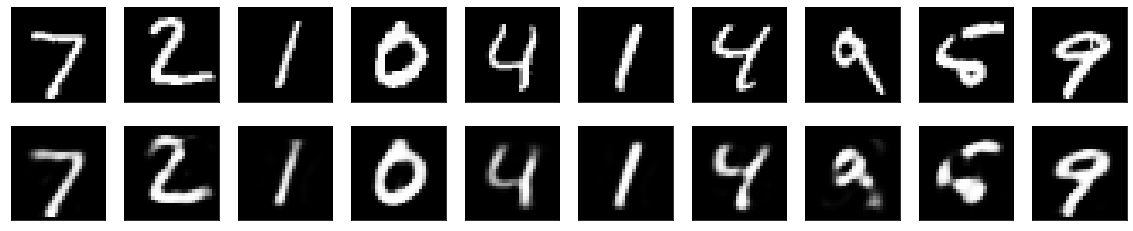

In [13]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 10 # digits to displayy
plt.figure(figsize=((20,4)))

for x in range(n):
    # Original
    ax = plt.subplot(2, n, x+1)
    plt.imshow(x_test[x].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstruction
    ax = plt.subplot(2, n, x+1 + n)
    plt.imshow(decoded_imgs[x].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



In [7]:
## Anadiendo una restriccion a la capa para que no todos los nodos se activen si no son necesarios.

from keras import regularizers
encoding_dim = 32

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img)

decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)


In [ ]:
##Train model
## Normalizamos los datos y entrenamos con 100 epochs

autoencoder.fit(x_train,
                x_train,
                epochs=100,
                batch_size = 256,
                shuffle=True,
                validation_data = (x_test,x_test)
)


In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 10 # digits to displayy
plt.figure(figsize=((20,4)))

for x in range(n):
    # Original
    ax = plt.subplot(2, n, x+1)
    plt.imshow(x_test[x].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstruction
    ax = plt.subplot(2, n, x+1 + n)
    plt.imshow(decoded_imgs[x].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [14]:
## Deep autoencoder --Utilizar multiples capas en vez de una sola de encoder/decoder

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(256, activation='relu')(decoded)

decoded = layers.Dense(784, activation='relu')(decoded)


In [15]:
autoencoder = keras.Model(input_img,decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train,
                x_train,
                batch_size=256,
                epochs=100,
                shuffle=True,
                validation_data=(x_test,x_test) 
                )
                


Epoch 1/100
235/235 [==============================] - 4s 16ms/step - loss: 0.3983 - val_loss: 0.3374
Epoch 2/100
235/235 [==============================] - 4s 15ms/step - loss: 0.3107 - val_loss: 0.2873
Epoch 3/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2848 - val_loss: 0.2782
Epoch 4/100
235/235 [==============================] - 4s 17ms/step - loss: 0.2903 - val_loss: 0.3363
Epoch 5/100
235/235 [==============================] - 5s 20ms/step - loss: 0.2905 - val_loss: 0.2746
Epoch 6/100
235/235 [==============================] - 5s 20ms/step - loss: 0.2884 - val_loss: 0.2787
Epoch 7/100
235/235 [==============================] - 5s 21ms/step - loss: 0.2753 - val_loss: 0.2547
Epoch 8/100
235/235 [==============================] - 5s 19ms/step - loss: 0.2602 - val_loss: 0.2604
Epoch 9/100
235/235 [==============================] - 4s 16ms/step - loss: 0.2476 - val_loss: 0.2422
Epoch 10/100
235/235 [==============================] - 4s 16ms/step - loss: 0.247

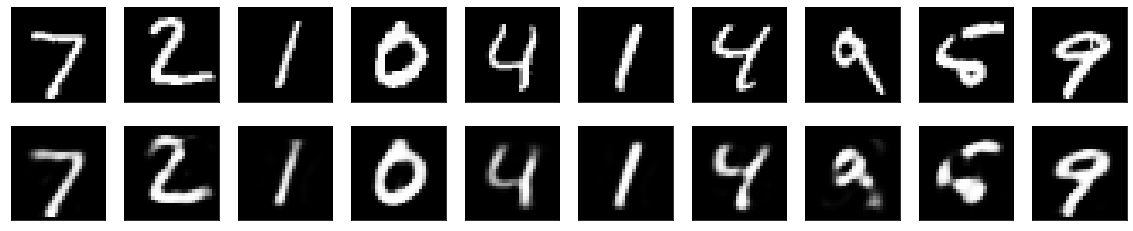

In [16]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 10 # digits to displayy
plt.figure(figsize=((20,4)))

for x in range(n):
    # Original
    ax = plt.subplot(2, n, x+1)
    plt.imshow(x_test[x].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstruction
    ax = plt.subplot(2, n, x+1 + n)
    plt.imshow(decoded_imgs[x].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [21]:
## Autoencoder convolucional(convnets)

import keras
from keras import layers

input_img = keras.Input(shape=(28,28,1))

x = layers.Conv2D(16, (3,3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2,2), padding='same')(x)
x = layers.Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2,2), padding='same')(x)
x = layers.Conv2D(8, (3,3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2,2), padding='same')(x)

x = layers.Conv2D(8, (3,3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2,2))(x)
x = layers.Conv2D(16, (3,3), activation='relu')(x)
x = layers.UpSampling2D((2,2))(x)

decoded = layers.Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')




In [22]:
## Entrenamos a mnist con shape(n`samples,3,28,28),normalizandolo

from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
## Vamos a utilizar tensorboard para monitorizar el entreno en tiempo real
## En consola: $ tensorboard --logdir=/tmp/autoencoder


from keras.callbacks import TensorBoard

autoencoder.fit(x_train,
                x_train,
                batch_size=128,
                epochs=50,
                shuffle=True,
                validation_data=(x_test,x_test),
                )

## Los resultados se ven en el puerto 6006 en local      

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for x in range(1, n + 1):
    
    ## El input original
    ax = plt.subplot(2, n, x)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ## La imagen reconstruida
    ax = plt.subplot(2, n, x + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()



In [ ]:
## Para secuencias en lugar de vectores/imagenes seria mejor utilizar un autoencoder basado en LSTM.
#Primero le pasamos al encoder la secuencia del input en un vector y repetir dicho vector n veces y finalmente un decodificador modificara esta secuencia constance en la secuencia querida.
## Estructura basica es la siguiente:
inputs = keras.Input(shape=(timesteps, input_dim))
encoded = layers.LSTM(latent_dim)(inputs)

decoded = layers.RepeatVector(timesteps)(encoded)
decoded = layers.LSTM(input_dim, return_sequences = True)(decoded)

seq_autoencoder = keras.Model(inputs,decoded)

encoder = keras.Model(inputs,encoded)

## Variational autoencoder-- version mas moderna del autoencoder tradicional con unas restricciones en la representacion codificada de los datos.
## Encoder -> input x en dos parametros del espacio: z_mean y z_log_sigma y despues coger varios puntos similares con de la distribucion mediante z = z_mean + exp(z_log_sigma) * epsilon. Finalmente un decoder mapea los puntos obtenidos del espacio a los datos del input.


In [3]:
## Variational autoencoder
import keras
from keras import layers
from keras import backend as BE


inputs = keras.Input(shape=(784,))
lay_h = layers.Dense(64, activation='relu')(inputs)
z_mean = layers.Dense(2)(lay_h)
z_log_sigm = layers.Dense(2)(lay_h)

def sampling(args):
    z_mean, z_log_sigma = args
    eps = BE.random_normal(shape=(BE.shape(z_mean)[0],2), mean=0.0,stddev=0.1)
    return z_mean * BE.exp(z_log_sigm) * eps

z = layers.Lambda(sampling)([z_mean,z_log_sigm])


In [5]:
## Los puntos recogidos de las pruebas se mapean a los inputs reconstruidos

encoder = keras.Model(inputs, [z_mean, z_log_sigm, z], name='encoder')

latent_inputs = keras.Input(shape=(2,), name='z_sampling')
x = layers.Dense(64, activation='relu')(latent_inputs)
outputs = layers.Dense(784, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs,outputs, name="vae_aut")


In [17]:
## Entrenamos el modelo utilizando el modelo de pto-a-pto es decir mapeando directamnte los inputs a las reconstrucciones mediante un termino de reconstruccion y un termino kl de regularizacion


reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= 784
kl_loss = 1 + z_log_sigm - BE.square(z_mean) - BE.exp(z_log_sigm)
kl_loss = BE.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = BE.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')


TypeError: unhashable type: 'DictWrapper'

In [18]:
from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        epochs=100,
        batch_size=32,
        validation_data=(x_test, x_test))

Epoch 1/100


_SymbolicException: Inputs to eager execution function cannot be Keras symbolic tensors, but found [<tf.Tensor 'dense_2/BiasAdd:0' shape=(None, 2) dtype=float32>]

In [ ]:
## Como el espacio es en 2 dimensiones podemos agrupar y ver los vecinos de las diferentes clases

x_test_enc = encoder.predict(x_test, batch_size = batch_size )
plt.figure(figsize=(6,6))
plt.scatter(x_test_enc[:, 0], x_test_enc[:, 1], c =y_test)
plt.colorbar()
plt.show()